In [1]:
import mga
import numpy as np
import matplotlib.pyplot as plt
from problems import ChankongHaimes
from problems import BinhKorn

In [2]:
problem = ChankongHaimes()
random_restarts = 500
MGA = mga.MicroGeneticAlgorithm(
    problem,
    num_variables=2,
    population_size=10,
    agents_to_keep=5,
    agents_to_shuffle=4,
    random_restarts=random_restarts,
    max_iterations=50,
    num_bits=64,
    random_seed=42,
)
MGA.run_iterations()

Random restart: 0 starting, best fitness is -53.50609899531713             and best agent is [-3.41981663 14.54072562]
[0.37454012 0.62545988]
Random restart: 1 starting, best fitness is -119.57231556072253             and best agent is [-3.41981663 14.54072562]
[0.22048764 0.77951236]
Random restart: 2 starting, best fitness is 10.033683132723866             and best agent is [-0.74758486  3.86651628]
[0.7636153 0.2363847]
Random restart: 3 starting, best fitness is -150.1861933458216             and best agent is [-3.28830669 14.56463185]
[0.14830173 0.85169827]
Random restart: 4 starting, best fitness is 11.087890635052515             and best agent is [0.50090557 4.1203309 ]
[0.84926875 0.15073125]
Random restart: 5 starting, best fitness is 9.116234023166044             and best agent is [0.7073461  3.68011929]
[0.85110345 0.14889655]
Random restart: 6 starting, best fitness is -13.87869879049589             and best agent is [-2.01367102 14.83221011]
[0.46688422 0.53311578]
Rando

In [3]:
f1 = np.zeros((random_restarts))
f2 = np.zeros((random_restarts))
for i in range(len(MGA.best_agents)):
    f1[i] = problem.f_1(MGA.best_agents[i])
    f2[i] = problem.f_2(MGA.best_agents[i])

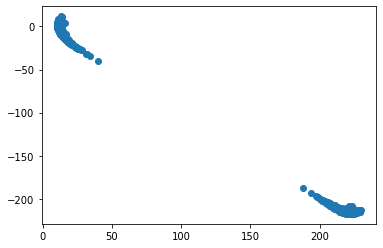

In [4]:
plt.scatter(f1,f2)

In [5]:
import benchmark_chankong_haimes as bm
from pymoo.optimize import minimize
from pymoo.core.problem import ElementwiseProblem
from pymoo.visualization.scatter import Scatter

# Predefined Problems, Algorithms and Terminations
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.util.termination.default import MultiObjectiveDefaultTermination

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  0.00000E+00 |  2.175589973 |       9 |            - |            -
    2 |     200 |  0.00000E+00 |  0.154700553 |      15 |  0.022606580 |        ideal
    3 |     300 |  0.00000E+00 |  0.00000E+00 |      31 |  0.004910784 |        ideal
    4 |     400 |  0.00000E+00 |  0.00000E+00 |      39 |  0.002983203 |        nadir
    5 |     500 |  0.00000E+00 |  0.00000E+00 |      61 |  0.010176867 |            f
    6 |     600 |  0.00000E+00 |  0.00000E+00 |      94 |  0.100545200 |        ideal
    7 |     700 |  0.00000E+00 |  0.00000E+00 |     100 |  0.032386585 |        nadir
    8 |     800 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002606420 |            f
    9 |     900 |  0.00000E+00 |  0.00000E+00 |     100 |  0.011328152 |        ideal
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |     100 |  0.001791952 |            f
   11 |    1100 |  0.00000E+00 |  0.00000E+00 |     10

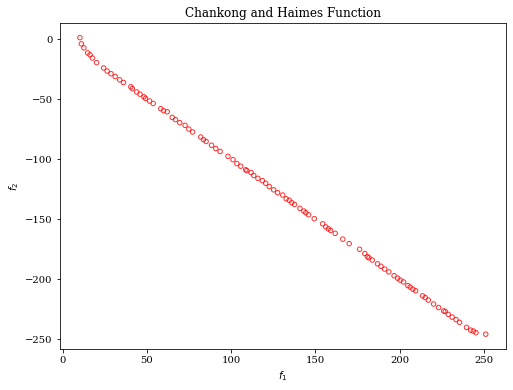

In [6]:
problem = bm.ChankongHaimes()
algorithm = NSGA2()
termination = MultiObjectiveDefaultTermination()
result = minimize(
    problem,
    algorithm,
    termination,
    pf=True,
    seed=1,
    save_history=True,
    verbose=True,
)
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.show()

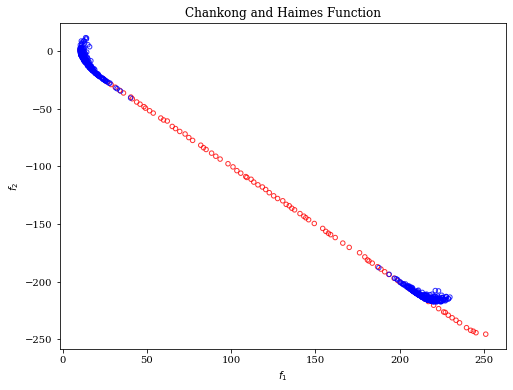

In [7]:
f = np.vstack((f1, f2)).T
#f = f[:100][:]
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.add(f, facecolor="none", edgecolor="blue", alpha=0.8, s=20)
plot.show()